In [1]:
import pandas as pd

In [2]:
dataf = pd.read_csv("cagi.mpra.per_model.scores.tsv", sep="\t", header=0)

In [3]:
dataf.head()

,chr,pos,allele1,allele2,rsid,logfc.mean,sign_jsd.mean,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,label,...,ref,alt,chr_hg38,pos_hg38,ref_hg38,alt_hg38,label_hg38,Confidence_hg38,SAD,SAR
0,chr6,37775290,G,A,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv",-0.130221,-0.029623,0.000808,0.057231,0.03,...,G,A,chr6,37807514,G,A,0.03,0.01,-0.021439,-0.025864
1,chr6,37775290,G,C,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv",-0.079846,-0.022760,0.000452,0.125456,0.03,...,G,C,chr6,37807514,G,C,0.03,0.01,-0.013206,-0.015869
2,chr6,37775290,G,T,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv",-0.102046,-0.031783,0.000633,0.065748,0.07,...,G,T,chr6,37807514,G,T,0.07,0.01,-0.022903,-0.027649
3,chr6,37775291,T,A,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv",0.015090,0.021831,0.000192,0.174132,-0.07,...,T,A,chr6,37807515,T,A,-0.07,0.01,0.005508,0.006592
4,chr6,37775291,T,C,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv",0.072389,0.028991,0.000554,0.099254,0.03,...,T,C,chr6,37807515,T,C,0.03,0.01,0.028412,0.033691


In [4]:
dataf.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'sign_jsd.mean', 'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval', 'label', 'Confidence',
       'challenge', 'model_used', 'chr_hg19', 'pos_hg19', 'ref', 'alt',
       'chr_hg38', 'pos_hg38', 'ref_hg38', 'alt_hg38', 'label_hg38',
       'Confidence_hg38', 'SAD', 'SAR'],
      dtype='object')

In [5]:
import numpy as np
dataf = dataf[~np.isnan(dataf["SAD"])]

In [36]:
challenges = list(set(dataf["challenge"]))

In [37]:
import scipy.stats

enf_preds_dir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/"

pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}

for challenge in challenges:
    temp = dataf[dataf["challenge"] == challenge]
    models = list(set(temp["model_used"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    for model in models:
        temp_new = temp[temp["model_used"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

        pear = scipy.stats.pearsonr(temp_new["label"],temp_new["logfc.mean"])
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(temp_new["label"],temp_new["sign_jsd.mean"])
        pear_dict_jsd[challenge].append(pear)

        ifile = enf_preds_dir + challenge.replace("challenge_","").replace(".tsv","") + ".ZigaDataLocal.csv"
        dnf=pd.read_csv(ifile, sep=",", header=0)
        pear1 = scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"])
        
        pear_dict_enf[challenge].append(pear1)



In [38]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    print(key)
    print(pear_dict_logfc[key])
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 


challenge_IRF6.tsv
[(0.6863978095129647, 2.9969485291779e-189), (0.6855702910433198, 1.2787248261565636e-188), (0.6844426312373798, 9.162780560960268e-188)]
challenge_F9.tsv
[(0.3278058135324871, 3.3786553145326075e-18)]
challenge_LDLR.tsv
[(0.5571818417723304, 1.0332418194611135e-59)]
challenge_GP1BB.tsv
[(0.5215335208116025, 1.4335645617060139e-61)]
challenge_ZFAND3.tsv
[(0.44484781066968043, 1.2314636625275076e-61), (0.3984857758855108, 1.0109777074904528e-48), (0.2891811987098261, 1.9042474170665058e-25), (0.2958126463496242, 1.3278182288448838e-26), (0.3192111247029, 6.209806529740245e-31)]
challenge_MYCrs6983267.tsv
[(0.5078362906951961, 2.593999727387911e-90)]
challenge_HBB.tsv
[(0.5472988538268535, 4.0027204727308833e-35)]
challenge_TERT-HEK293T.tsv
[(0.5553154805041812, 7.931503234163681e-48)]
challenge_SORT1.tsv
[(0.7609120286314868, 5.326426982528549e-257)]
challenge_IRF4.tsv
[(0.8154299895742269, 1.5489669725325216e-232)]
challenge_HNF4A.tsv
[(0.34006638384182497, 1.4232445

challenge_IRF6.tsv (0.6863978095129647, 0.647739059957578)
challenge_F9.tsv (0.3278058135324871, 0.2910237971063166)
challenge_LDLR.tsv (0.5571818417723304, 0.6279168449537609)
challenge_GP1BB.tsv (0.5215335208116025, 0.5639564947233268)
challenge_ZFAND3.tsv (0.44484781066968043, 0.44980549021497984)
challenge_MYCrs6983267.tsv (0.5078362906951961, 0.5589049959383294)
challenge_HBB.tsv (0.5472988538268535, 0.5784344527267236)
challenge_TERT-HEK293T.tsv (0.5553154805041812, 0.5871151716773245)
challenge_SORT1.tsv (0.7609120286314868, 0.6187820217627544)
challenge_IRF4.tsv (0.8154299895742269, 0.7141790825255856)
challenge_HNF4A.tsv (0.34006638384182497, 0.288200934853065)
challenge_HBG1.tsv (0.5437910247812469, 0.18851068518283778)
challenge_PKLR.tsv (0.8120143586029585, 0.8091312664217033)
challenge_MSMB.tsv (0.19855880983217153, 0.1191656497017333)


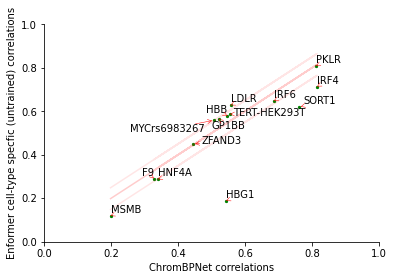

In [39]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

In [40]:
scipy.stats.mannwhitneyu(best_pear_logfc, best_pear_sad)

MannwhitneyuResult(statistic=97.0, pvalue=0.9816711400706458)

In [41]:
np.mean(best_pear_logfc)

0.5442135726135151

In [42]:
np.mean(best_pear_sad)

0.5030618534104299

In [15]:
import scipy.stats

enf_preds_dir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/"

pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}

for challenge in challenges:
    temp = dataf[dataf["challenge"] == challenge]
    models = list(set(temp["model_used"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    for model in models:
        temp_new = temp[temp["model_used"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

        pear = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["logfc.mean"]))
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["sign_jsd.mean"]))
        pear_dict_jsd[challenge].append(pear)

        ifile = enf_preds_dir + challenge.replace("challenge_","").replace(".tsv","") + ".ZigaDataLocal.csv"
        dnf=pd.read_csv(ifile, sep=",", header=0)
        pear1 = scipy.stats.pearsonr(abs(dnf["data.Value"]),abs(dnf["dnase"]))
        
        pear_dict_enf[challenge].append(pear1)



In [16]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 


challenge_IRF6.tsv (0.688024621814145, 0.6549134344255393)
challenge_F9.tsv (0.08162256518538383, 0.08819851923478136)
challenge_LDLR.tsv (0.6045974580705764, 0.579072736314436)
challenge_GP1BB.tsv (0.4954772436774826, 0.47205022981619266)
challenge_ZFAND3.tsv (0.41884266063861497, 0.4171465992089521)
challenge_MYCrs6983267.tsv (0.5365007062961231, 0.573783992279473)
challenge_HBB.tsv (0.4131418431199688, 0.4249386569940439)
challenge_TERT-HEK293T.tsv (0.43998778134423205, 0.46237325058903983)
challenge_SORT1.tsv (0.7337050220520509, 0.5220823990168146)
challenge_IRF4.tsv (0.8145174978461941, 0.6261232756990919)
challenge_HNF4A.tsv (0.2964168915155524, 0.29097554418302185)
challenge_HBG1.tsv (0.48106994565359995, 0.14587095143969553)
challenge_PKLR.tsv (0.8194964319535258, 0.7968832540705849)
challenge_MSMB.tsv (0.18064507834629845, 0.09576838651866845)


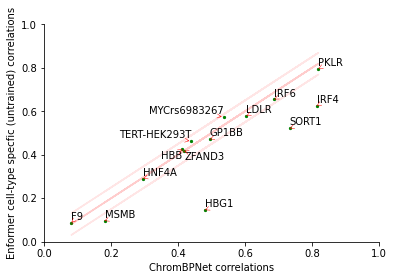

In [18]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_logfc_abs.pdf", transparent=True, dpi=300)

(0.5437910247812469, 9.119319172115673e-50)
(0.18851068518283778, 1.8888239190707555e-06)
(0.19855880983217153, 2.1753443562357922e-13)
(0.1191656497017333, 0.0003614069297465672)
(0.8154299895742269, 1.5489669725325216e-232)
(0.7141790825255856, 1.8925793862734474e-152)
(0.7609120286314868, 5.326426982528549e-257)
(0.6187820217627544, 1.1822834552124175e-136)


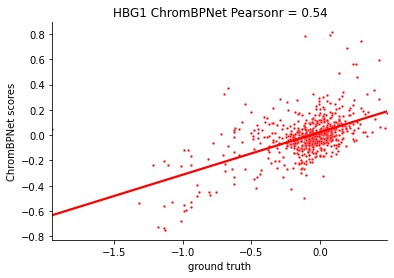

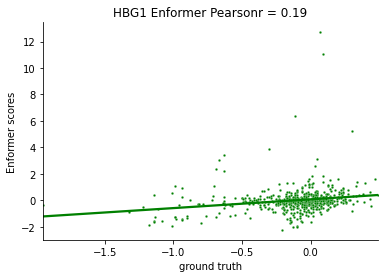

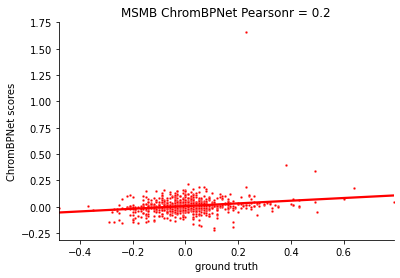

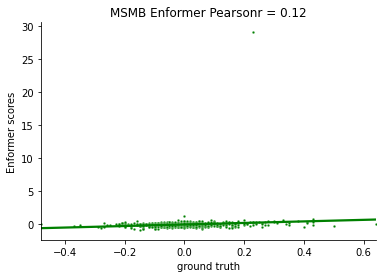

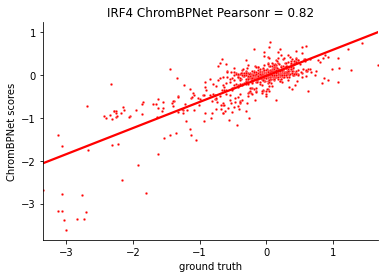

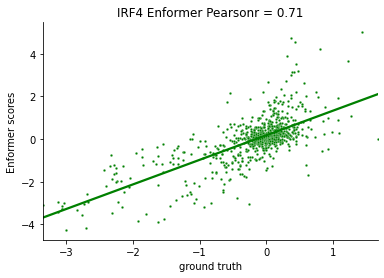

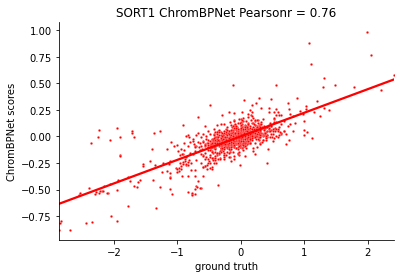

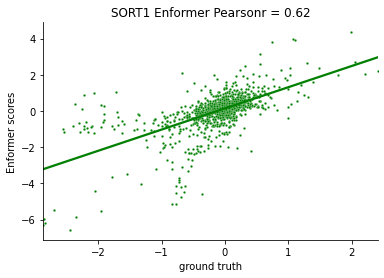

In [29]:
import scipy.stats

enf_preds_dir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/"

pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}
import seaborn as sns

for challenge in ["challenge_HBG1.tsv", "challenge_MSMB.tsv", "challenge_IRF4.tsv", "challenge_SORT1.tsv"]:
    temp = dataf[dataf["challenge"] == challenge]
    models = list(set(temp["model_used"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    for model in models:
        temp_new = temp[temp["model_used"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)
        
        challengen = challenge.replace("challenge_","").replace(".tsv","")
                    
        fig, ax =  plt.subplots()
        ax = sns.scatterplot(x="label", y="logfc.mean", data=temp_new, s=6, color="red")
        sns.regplot(x="label", y="logfc.mean", data=temp_new, scatter=False, ci=None, color="red")
        ax.set_xlabel("ground truth")
        ax.set_ylabel("ChromBPNet scores")
        ax.set_title(challengen+" ChromBPNet Pearsonr = "+str(np.round(scipy.stats.pearsonr(temp_new["label"],temp_new["logfc.mean"])[0],2)))
        ax.spines[["top", "right"]].set_visible(False)
        plt.savefig("subfigs/cagi_chrombpnet_"+challengen+".pdf", transparent=True, dpi=300)
        print(scipy.stats.pearsonr(temp_new["label"],temp_new["logfc.mean"]))
                    
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(temp_new["label"],temp_new["sign_jsd.mean"])
        pear_dict_jsd[challenge].append(pear)

        ifile = enf_preds_dir + challengen + ".ZigaDataLocal.csv"
        dnf=pd.read_csv(ifile, sep=",", header=0)
        pear1 = scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"])
        
        pear_dict_enf[challenge].append(pear1)

        fig, ax =  plt.subplots()
        ax = sns.scatterplot(x="data.Value", y="dnase", data=dnf, s=6, color="green")
        sns.regplot(x="data.Value", y="dnase", data=dnf, scatter=False, ci=None, color="green")
        ax.set_xlabel("ground truth")
        ax.set_ylabel("Enformer scores")
        ax.set_title(challengen+" Enformer Pearsonr = "+str(np.round(scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"])[0],2)))
        print(scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"]))
        ax.spines[["top", "right"]].set_visible(False)
        plt.savefig("subfigs/cagi_enformer_"+challengen+".pdf", transparent=True, dpi=300)

